In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data files
remind_file = '/content/Downscaled_REMIND-MAgPIE 3.2-4.6_data.xlsx'
nigem_file = '/content/NiGEM_data.xlsx'

In [3]:
# Load REMIND-MAgPIE data
remind_df = pd.read_excel(remind_file)

# Load NiGEM macroeconomic data
nigem_df = pd.read_excel(nigem_file)

In [4]:
print(remind_df.columns.tolist())

['Model', 'Scenario', 'Region', 'Variable', 'Unit', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100']


In [5]:
# Melt from wide to long format
remind_long = remind_df.melt(
    id_vars=['Model', 'Scenario', 'Region', 'Variable', 'Unit'],
    var_name='Year',
    value_name='Value'
)
nigem_long = nigem_df.melt(
    id_vars=['Model', 'Scenario', 'Region', 'Variable', 'Unit'],
    var_name='Year',
    value_name='Value'
)

In [6]:
nigem_long['Region'] = nigem_long['Region'].str.split('|').str[-1].str.strip()

In [8]:
nigem_long.head()

,Model,Scenario,Region,Variable,Unit,Year,Value
0,NiGEM NGFS v1.23.2[Climate Analytics],Delayed transition,Africa,Gross Domestic Product (GDP)(cyclone-60),"% difference, 2017 PPP; local currency",2022,-1.120393
1,NiGEM NGFS v1.23.2[Climate Analytics],Delayed transition,Africa,Gross Domestic Product (GDP)(cyclone-65),"% difference, 2017 PPP; local currency",2022,-1.254201
2,NiGEM NGFS v1.23.2[Climate Analytics],Delayed transition,Africa,Gross Domestic Product (GDP)(cyclone-70),"% difference, 2017 PPP; local currency",2022,-1.664838
3,NiGEM NGFS v1.23.2[Climate Analytics],Delayed transition,Africa,Gross Domestic Product (GDP)(cyclone-75),"% difference, 2017 PPP; local currency",2022,-2.551989
4,NiGEM NGFS v1.23.2[Climate Analytics],Delayed transition,Africa,Gross Domestic Product (GDP)(cyclone-80),"% difference, 2017 PPP; local currency",2022,-4.044783


In [9]:
# Ensure year is numeric
remind_long['Year'] = remind_long['Year'].astype(int)
nigem_long['Year'] = nigem_long['Year'].astype(int)

In [10]:
# Define scenarios and region of interest
scenarios = ['Net Zero 2050', 'Delayed transition']
region = 'EU27'
region_n = 'Europe'

In [11]:
remind_filtered = remind_long[
    (remind_long['Scenario'].isin(scenarios)) &
    (remind_long['Region'] == region) &
    (remind_long['Variable'].isin(['Price|Carbon', 'Emissions|CO2|Energy']))
]

nigem_filtered = nigem_long[
    (nigem_long['Scenario'].isin(scenarios)) &
    (nigem_long['Variable'] == 'Gross Domestic Product (GDP)(transition)') &
    (nigem_long['Region'] == region_n)
]

In [12]:
# Pivot to get variable by year
remind_pivot = remind_filtered.pivot_table(
    index=['Scenario', 'Variable', 'Region'], columns='Year', values='Value'
)
nigem_pivot = nigem_filtered.pivot_table(
    index=['Scenario', 'Variable', 'Region'], columns='Year', values='Value'
)

In [13]:
remind_pivot

Year                                                   2020         2025  \
Scenario           Variable             Region                             
Delayed transition Emissions|CO2|Energy EU27    2586.508033  2079.258967   
                   Price|Carbon         EU27      27.693100    26.331267   
Net Zero 2050      Emissions|CO2|Energy EU27    2587.316167  1962.965967   
                   Price|Carbon         EU27      27.693100   195.603033   

Year                                                   2030         2035  \
Scenario           Variable             Region                             
Delayed transition Emissions|CO2|Energy EU27    1802.298700  1390.577500   
                   Price|Carbon         EU27      25.016500   252.757100   
Net Zero 2050      Emissions|CO2|Energy EU27    1164.898433   376.602733   
                   Price|Carbon         EU27     253.062333   397.792700   

Year                                                  2040        2045  \
Scenario           Variable             Region                           
Delayed transition Emissions|CO2|Energy EU27    350.859900 -141.372000   
                   Price|Carbon         EU27    418.201367  583.499033   
Net Zero 2050      Emissions|CO2|Energy EU27   -200.658533 -370.222700   
                   Price|Carbon         EU27    542.673900  687.485800   

Year                                                  2050       2055  \
Scenario           Variable             Region                          
Delayed transition Emissions|CO2|Energy EU27   -330.694767 -368.44245   
                   Price|Carbon         EU27    748.943433  738.65615   
Net Zero 2050      Emissions|CO2|Energy EU27   -439.713367 -433.80505   
                   Price|Carbon         EU27    832.367233  838.15085   

Year                                                2060       2065  \
Scenario           Variable             Region                        
Delayed transition Emissions|CO2|Energy EU27   -395.5893 -412.66015   
                   Price|Carbon         EU27    736.0478  725.44070   
Net Zero 2050      Emissions|CO2|Energy EU27   -431.7173 -387.89110   
                   Price|Carbon         EU27    868.5986  890.37225   

Year                                                 2070       2075  \
Scenario           Variable             Region                         
Delayed transition Emissions|CO2|Energy EU27   -429.71890 -388.35805   
                   Price|Carbon         EU27    714.83360  716.67670   
Net Zero 2050      Emissions|CO2|Energy EU27   -344.67235 -309.68310   
                   Price|Carbon         EU27    912.14585  946.52445   

Year                                                 2080        2085  \
Scenario           Variable             Region                          
Delayed transition Emissions|CO2|Energy EU27   -347.15640  -292.46945   
                   Price|Carbon         EU27    718.51975   716.74650   
Net Zero 2050      Emissions|CO2|Energy EU27   -276.94270  -286.30935   
                   Price|Carbon         EU27    980.90305  1014.29835   

Year                                                  2090        2095  \
Scenario           Variable             Region                           
Delayed transition Emissions|CO2|Energy EU27    -238.87655  -231.37815   
                   Price|Carbon         EU27     714.97320   714.89640   
Net Zero 2050      Emissions|CO2|Energy EU27    -297.91755  -308.72410   
                   Price|Carbon         EU27    1047.69365  1077.18745   

Year                                                  2100  
Scenario           Variable             Region              
Delayed transition Emissions|CO2|Energy EU27    -224.11150  
                   Price|Carbon         EU27     714.81965  
Net Zero 2050      Emissions|CO2|Energy EU27    -319.69270  
                   Price|Carbon         EU27    1106.68125

In [14]:
nigem_pivot

,,Year,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Scenario,Variable,Region,,,,,,,,,,,,,,,,,,,,,
Delayed transition,Gross Domestic Product (GDP)(transition),Europe,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.211104,...,-0.707438,-0.745747,-0.788750,-0.834480,-0.884500,-0.931998,-0.969640,-0.998323,-1.016418,-1.020630
Net Zero 2050,Gross Domestic Product (GDP)(transition),Europe,0.0,-0.07138,-0.89116,-1.079191,-1.034871,-0.913566,-0.773101,-0.62593,-0.466276,-0.378482,...,0.144864,0.169195,0.193125,0.218519,0.246833,0.256492,0.252234,0.247595,0.241775,0.234063


In [15]:
print(remind_pivot.columns)  # Should be like Ints: 2020, 2025, ...
print(nigem_pivot.columns)

Index([2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075,
       2080, 2085, 2090, 2095, 2100],
      dtype='int64', name='Year')
Index([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049, 2050],
      dtype='int64', name='Year')


In [16]:
common_years = remind_pivot.columns.intersection(nigem_pivot.columns)


In [17]:
common_years

Index([2025, 2030, 2035, 2040, 2045, 2050], dtype='int64', name='Year')

# Logit-Transformed Model

In [50]:
import numpy as np

results = []

# Set coefficients
beta_macro = 3
beta_carbon = 1.5
beta_emissions = 2  # example coefficient, tune as needed
pd_base = 0.02

for scenario in scenarios:
    for year in common_years:
        try:
            carbon_price = remind_pivot.loc[(scenario, 'Price|Carbon', 'EU27'), year]
            gdp = nigem_pivot.loc[(scenario, 'Gross Domestic Product (GDP)(transition)', 'Europe'), year]
            emissions = remind_pivot.loc[(scenario, 'Emissions|CO2|Energy', 'EU27'), year]

            # Calculate shocks/growths
            gdp_shock = (gdp - 100) / 100  # baseline = 100
            carbon_shock = (carbon_price - 50) / 50  # baseline = 50

            # Emissions baseline assumed at baseline year (e.g., 2020)
            baseline_year = 2020
            emissions_baseline = remind_pivot.loc[(scenario, 'Emissions|CO2|Energy', 'EU27'), baseline_year]
            emissions_growth = (emissions - emissions_baseline) / emissions_baseline

            # Logit transform PD_base
            logit_pd_base = np.log(pd_base / (1 - pd_base))

            # Compute new logit PD
            logit_pd_new = (logit_pd_base +
                            beta_macro * gdp_shock +
                            beta_carbon * carbon_shock +
                            beta_emissions * emissions_growth)

            # Inverse logit to get PD_new
            pd_new = 1 / (1 + np.exp(-logit_pd_new))

            results.append({'Scenario': scenario, 'Year': year, 'PD_new': pd_new})

        except KeyError:
            print(f"Missing data for {scenario}, {year}")
            continue


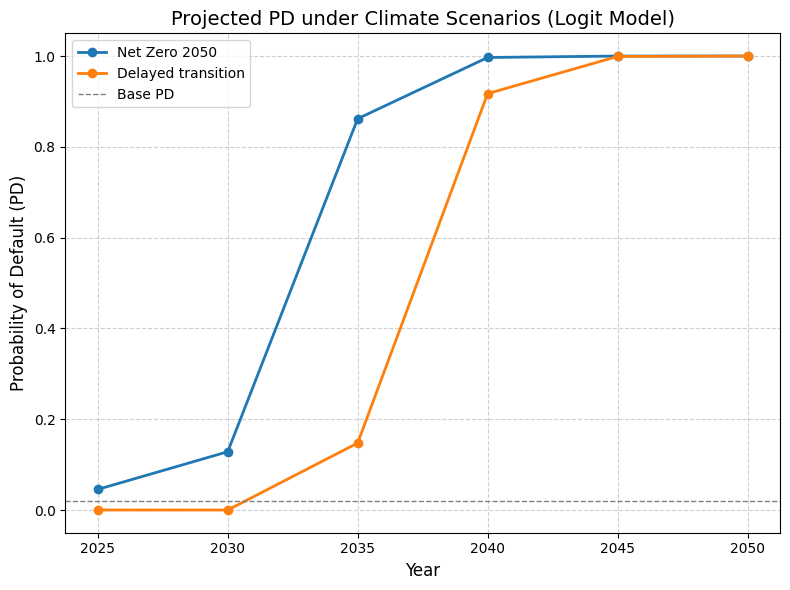

In [51]:
import matplotlib.pyplot as plt

# Convert results list to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

# Clip PDs between 0 and 1 to ensure valid probabilities
results_df['PD_new'] = results_df['PD_new'].clip(lower=0, upper=1)

plt.figure(figsize=(8, 6))

# Plot each scenario line
scenarios = results_df['Scenario'].unique()
for scenario in scenarios:
    df_scen = results_df[results_df['Scenario'] == scenario]
    plt.plot(df_scen['Year'], df_scen['PD_new'], label=scenario, linewidth=2, marker='o')

# Add a base PD reference line (adjust as needed)
PD_base = 0.02  # base PD used in model
plt.axhline(y=PD_base, color='gray', linestyle='--', linewidth=1, label='Base PD')

plt.title('Projected PD under Climate Scenarios (Logit Model)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Probability of Default (PD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Linear Model

In [52]:
# Parameters
beta_macro = 0.5
beta_carbon = 0.3
PD_base = 0.02

# Calculate PDs
results = []

In [53]:
for scenario in scenarios:
        for year in common_years:
            try:
                carbon_price = remind_pivot.loc[(scenario, 'Price|Carbon', 'EU27'), year]
                gdp = nigem_pivot.loc[(scenario, 'Gross Domestic Product (GDP)(transition)', 'Europe'), year]
                emissions = remind_pivot.loc[(scenario, 'Emissions|CO2|Energy', 'EU27'), year]
                gdp_shock = (gdp - 100) / 100  # assume baseline is 100
                carbon_shock = (carbon_price - 50) / 50  # assume baseline 50
                pd_base = 0.02
                beta_macro = 3
                beta_carbon = 1.5
                pd_new = pd_base * (1 + beta_macro * gdp_shock + beta_carbon * carbon_shock)
                results.append({'Scenario': scenario, 'Year': year, 'PD_new': pd_new})
            except KeyError:
                print(f"Missing data for {scenario}, {year}")
                continue

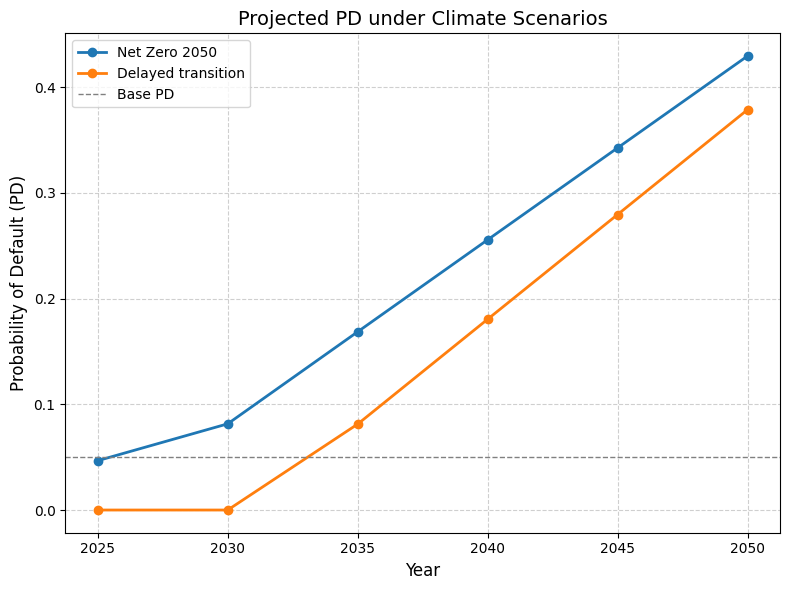

In [54]:
# Convert results list to DataFrame 
import pandas as pd
results_df = pd.DataFrame(results)

# Clip negative PDs (PD can't go below 0)
results_df['PD_new'] = results_df['PD_new'].clip(lower=0)

# Plot
plt.figure(figsize=(8, 6))

# Plot each scenario
scenarios = results_df['Scenario'].unique()
for scenario in scenarios:
    df_scen = results_df[results_df['Scenario'] == scenario]
    plt.plot(df_scen['Year'], df_scen['PD_new'], label=scenario, linewidth=2, marker='o')

# Optional: add base PD reference line
PD_base = 0.05  # adjust to your base PD value
plt.axhline(y=PD_base, color='gray', linestyle='--', linewidth=1, label='Base PD')

# Styling
plt.title('Projected PD under Climate Scenarios', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Probability of Default (PD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()